<a href="https://colab.research.google.com/github/HamdanXI/nlp_adventure/blob/main/nlp804/demucs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U denoiser

In [2]:
from IPython import display as disp
import torch
import torchaudio
from denoiser import pretrained
from denoiser.dsp import convert_audio

In [3]:
# Downloading a test file
!wget https://facebookresearch.github.io/denoiser/audio/noisy/alex_noisy.mp

--2024-01-30 15:44:18--  https://facebookresearch.github.io/denoiser/audio/noisy/alex_noisy.mp
Resolving facebookresearch.github.io (facebookresearch.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to facebookresearch.github.io (facebookresearch.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-01-30 15:44:18 ERROR 404: Not Found.



In [11]:
model = pretrained.dns64().cuda()

wav, sr = torchaudio.load('Noise.m4a')
wav_stationary, sr_stationary = torchaudio.load('Stationary Noise.m4a')

wav = convert_audio(wav.cuda(), sr, model.sample_rate, model.chin)
wav_stationary = convert_audio(wav_stationary.cuda(), sr_stationary, model.sample_rate, model.chin)

with torch.no_grad():
    denoised = model(wav[None])[0]
    denoised_stationary = model(wav_stationary[None])[0]

print("Non-Stationary Noise")
disp.display(disp.Audio(wav.data.cpu().numpy(), rate=model.sample_rate))
disp.display(disp.Audio(denoised.data.cpu().numpy(), rate=model.sample_rate))

print("Stationary Noise")
disp.display(disp.Audio(wav_stationary.data.cpu().numpy(), rate=model.sample_rate))
disp.display(disp.Audio(denoised_stationary.data.cpu().numpy(), rate=model.sample_rate))

Non-Stationary Noise


Stationary Noise


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

def plot_waveform(waveform, sample_rate, title="Waveform"):
    plt.figure(figsize=(10, 3))
    plt.plot(np.linspace(0, len(waveform) / sample_rate, len(waveform)), waveform)
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(signal, sample_rate, title="Spectrogram", ref=np.max):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=ref)
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

original_wav_np = wav.data.cpu().numpy()
denoised_wav_np = denoised.data.cpu().numpy()

original_stationary_wav_np = wav_stationary.data.cpu().numpy()
denoised_stationary_wav_np = denoised_stationary.data.cpu().numpy()

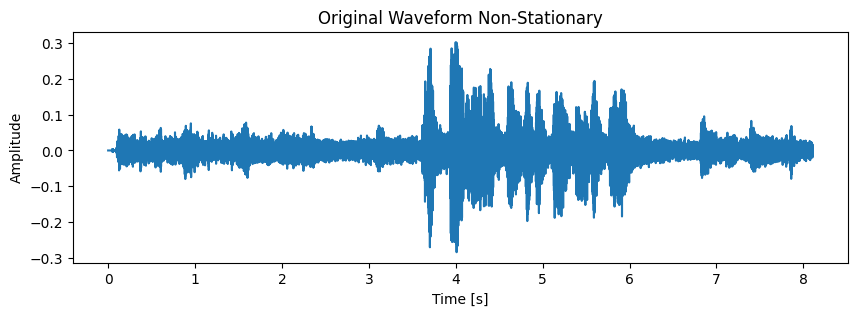

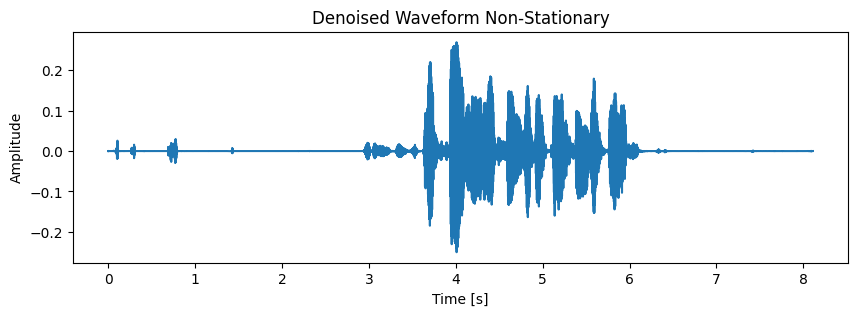

In [20]:
plot_waveform(original_wav_np[0], model.sample_rate, title="Original Waveform Non-Stationary")
plot_waveform(denoised_wav_np[0], model.sample_rate, title="Denoised Waveform Non-Stationary")

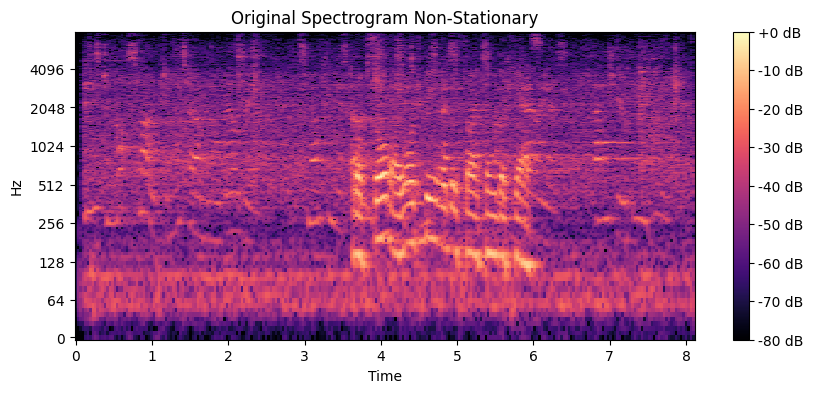

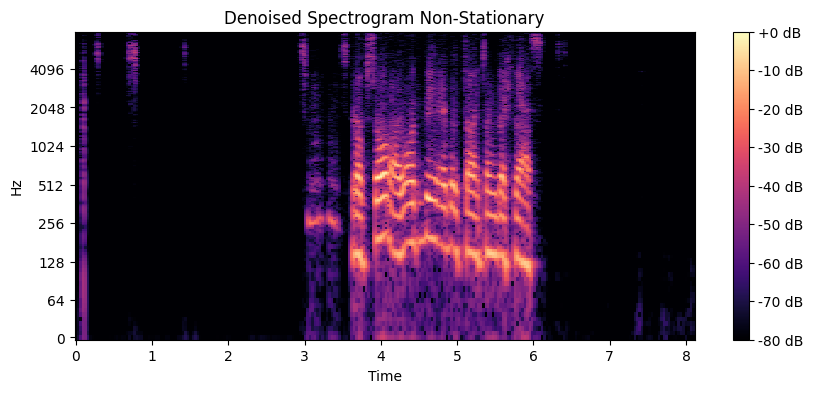

In [19]:
plot_spectrogram(original_wav_np[0], model.sample_rate, title="Original Spectrogram Non-Stationary")
plot_spectrogram(denoised_wav_np[0], model.sample_rate, title="Denoised Spectrogram Non-Stationary")

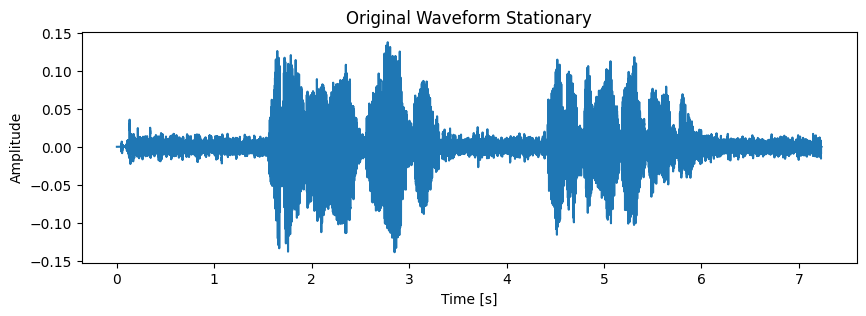

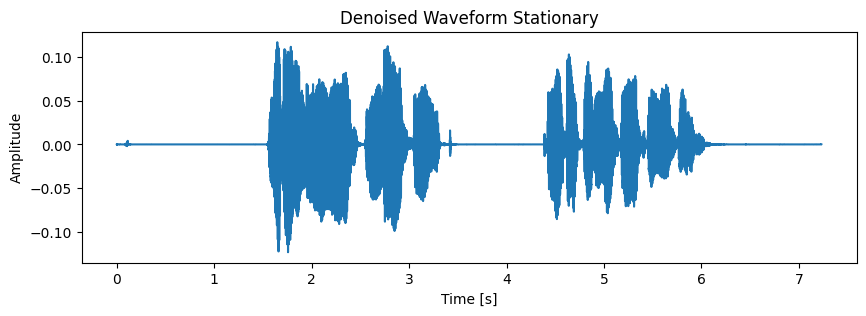

In [17]:
plot_waveform(original_stationary_wav_np[0], model.sample_rate, title="Original Waveform Stationary")
plot_waveform(denoised_stationary_wav_np[0], model.sample_rate, title="Denoised Waveform Stationary")

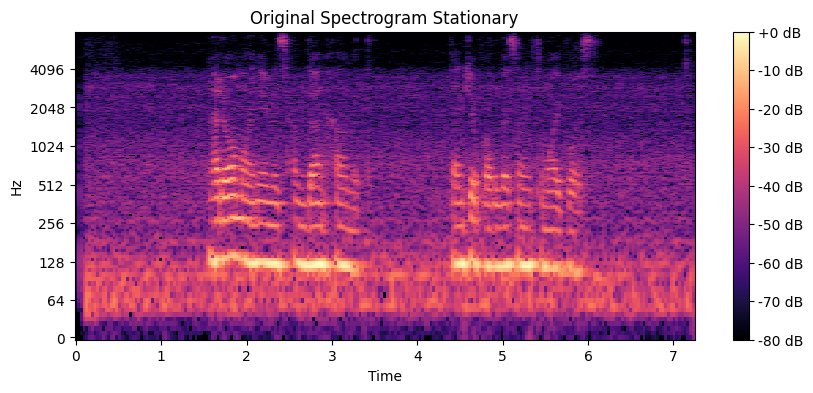

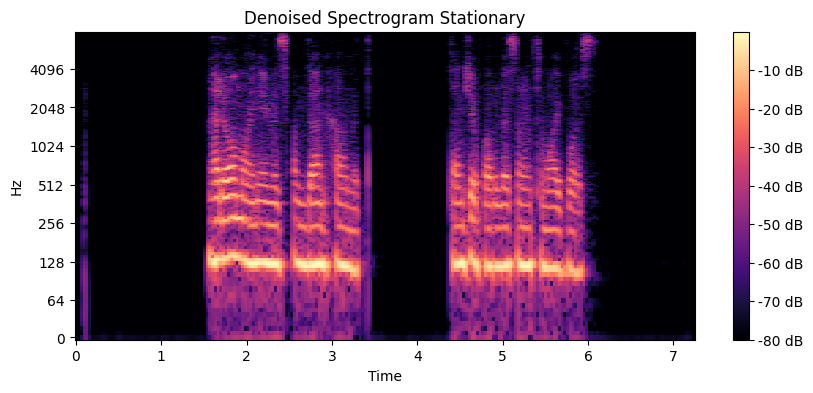

In [18]:
plot_spectrogram(original_stationary_wav_np[0], model.sample_rate, title="Original Spectrogram Stationary")
plot_spectrogram(denoised_stationary_wav_np[0], model.sample_rate, title="Denoised Spectrogram Stationary")